## Performance MPI

In the first step we will see how fast our code performs and what the straightforward insertion of compiler directives (pragmas) can do.

In [1]:
import timeit

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

We start by compiling the Fortran stencil2d base code (this is the code with inlining your have worked on previously).

In [6]:
%%bash
make clean

rm -f -rf *~ *.o *.mod *.MOD *.i core.* *.out *.lst *.x *.x+orig *.x+[0-9]* *.dat *.report result_*.py report*.txt


In [3]:
%%bash
module load daint-gpu
module switch PrgEnv-gnu PrgEnv-cray
module load perftools-lite

make clean
make VERSION=mpi

rm -f -rf *~ *.o *.mod *.MOD *.i core.* *.out *.lst *.x *.x+orig *.x+[0-9]* *.dat *.report result_*.py report*.txt
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c m_utils.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c m_partitioner.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm -c stencil2d-mpi.F90
ftn -O3 -hfp3 -eZ -ffree -N255 -ec -eC -eI -eF -rm m_utils.o m_partitioner.o stencil2d-mpi.o -o stencil2d-mpi.x


INFO: creating the PerfTools-instrumented executable 'stencil2d-mpi.x' (lite-samples) ...OK


cp stencil2d-mpi.x stencil2d.x


### nx = 120

In [4]:
%%bash
fname="MPI_nx120"
n_worker=1
workers="2 4 9 16 24"
echo "import numpy as np" >> $fname.py
for n_worker in $workers ; do
  echo "# n_workers = $n_worker" >> $fname.py
  echo "MPI_$n_worker = np.mean(np.array([" >> $fname.py
  for run in {1..10}; do
    echo "Using $n_worker workers, run num $run"
    srun -n $n_worker ./stencil2d-mpi.x+orig --nx 120 --ny 120 --nz 64 --num_iter 1024 >> $fname.py
  done
  sed -i '$ s/.$/]))/' $fname.py
done

Using 2 workers, run num 1
Using 2 workers, run num 2
Using 2 workers, run num 3


srun: Job 48640831 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48640831


Using 2 workers, run num 4
Using 2 workers, run num 5
Using 2 workers, run num 6
Using 2 workers, run num 7
Using 2 workers, run num 8
Using 2 workers, run num 9
Using 2 workers, run num 10
Using 4 workers, run num 1
Using 4 workers, run num 2
Using 4 workers, run num 3
Using 4 workers, run num 4
Using 4 workers, run num 5
Using 4 workers, run num 6
Using 4 workers, run num 7
Using 4 workers, run num 8
Using 4 workers, run num 9
Using 4 workers, run num 10
Using 9 workers, run num 1
Using 9 workers, run num 2
Using 9 workers, run num 3
Using 9 workers, run num 4
Using 9 workers, run num 5
Using 9 workers, run num 6
Using 9 workers, run num 7
Using 9 workers, run num 8
Using 9 workers, run num 9


srun: Job 48640831 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48640831


Using 9 workers, run num 10


srun: Job 48640831 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48640831


Using 16 workers, run num 1
Using 16 workers, run num 2


srun: Job 48640831 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48640831


Using 16 workers, run num 3
Using 16 workers, run num 4
Using 16 workers, run num 5
Using 16 workers, run num 6
Using 16 workers, run num 7
Using 16 workers, run num 8
Using 16 workers, run num 9
Using 16 workers, run num 10
Using 24 workers, run num 1
Using 24 workers, run num 2


srun: Job 48640831 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48640831


Using 24 workers, run num 3
Using 24 workers, run num 4
Using 24 workers, run num 5
Using 24 workers, run num 6


srun: Job 48640831 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48640831


Using 24 workers, run num 7
Using 24 workers, run num 8
Using 24 workers, run num 9
Using 24 workers, run num 10


### nx = 180

In [5]:
%%bash
fname="MPI_nx180"
n_worker=1
workers="2 4 9 16 24"
echo "import numpy as np" >> $fname.py
for n_worker in $workers ; do
  echo "# n_workers = $n_worker" >> $fname.py
  echo "MPI_$n_worker = np.mean(np.array([" >> $fname.py
  for run in {1..10}; do
    echo "Using $n_worker workers, run num $run"
    srun -n $n_worker ./stencil2d-mpi.x+orig --nx 180 --ny 180 --nz 64 --num_iter 1024 >> $fname.py
  done
  sed -i '$ s/.$/]))/' $fname.py
done

Using 2 workers, run num 1
Using 2 workers, run num 2
Using 2 workers, run num 3
Using 2 workers, run num 4
Using 2 workers, run num 5
Using 2 workers, run num 6
Using 2 workers, run num 7
Using 2 workers, run num 8
Using 2 workers, run num 9
Using 2 workers, run num 10
Using 4 workers, run num 1
Using 4 workers, run num 2
Using 4 workers, run num 3
Using 4 workers, run num 4
Using 4 workers, run num 5
Using 4 workers, run num 6


srun: Job 48640831 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48640831


Using 4 workers, run num 7


srun: Job 48640831 step creation temporarily disabled, retrying (Requested nodes are busy)
srun: Step created for job 48640831


Using 4 workers, run num 8
Using 4 workers, run num 9
Using 4 workers, run num 10
Using 9 workers, run num 1
Using 9 workers, run num 2
Using 9 workers, run num 3
Using 9 workers, run num 4
Using 9 workers, run num 5
Using 9 workers, run num 6
Using 9 workers, run num 7
Using 9 workers, run num 8
Using 9 workers, run num 9
Using 9 workers, run num 10
Using 16 workers, run num 1
Using 16 workers, run num 2
Using 16 workers, run num 3
Using 16 workers, run num 4
Using 16 workers, run num 5
Using 16 workers, run num 6
Using 16 workers, run num 7
Using 16 workers, run num 8
Using 16 workers, run num 9
Using 16 workers, run num 10
Using 24 workers, run num 1
Using 24 workers, run num 2
Using 24 workers, run num 3
Using 24 workers, run num 4
Using 24 workers, run num 5
Using 24 workers, run num 6
Using 24 workers, run num 7
Using 24 workers, run num 8
Using 24 workers, run num 9
Using 24 workers, run num 10


## Validation

As a first step, it is always good to make sure that the code is working correctly before proceeding with any sort of parallelization or optimization. We plot the initial and final step to see that the code still produces the same result.

In [63]:
def read_field_from_file(filename, num_halo=None):
    (rank, nbits, num_halo, nx, ny, nz) = np.fromfile(filename, dtype=np.int32, count=6)
    offset = (3 + rank) * 32 // nbits
    data = np.fromfile(
        filename,
        dtype=np.float32 if nbits == 32 else np.float64,
        count=nz * ny * nx + offset,
    )
    if rank == 3:
        return np.reshape(data[offset:], (nz, ny, nx))
    else:
        return np.reshape(data[offset:], (ny, nx))


def validate_results():
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))

    in_field = read_field_from_file("in_field.dat")
    im1 = axs[0].imshow(
        in_field[in_field.shape[0] // 2, :, :], origin="lower", vmin=-0.1, vmax=1.1
    )
    fig.colorbar(im1, ax=axs[0])
    axs[0].set_title("Initial condition")

    out_field = read_field_from_file("out_field.dat")
    im2 = axs[1].imshow(
        out_field[out_field.shape[0] // 2, :, :], origin="lower", vmin=-0.1, vmax=1.1
    )
    fig.colorbar(im2, ax=axs[1])
    axs[1].set_title("Final result")
    plt.savefig("V03.png")
    plt.show()

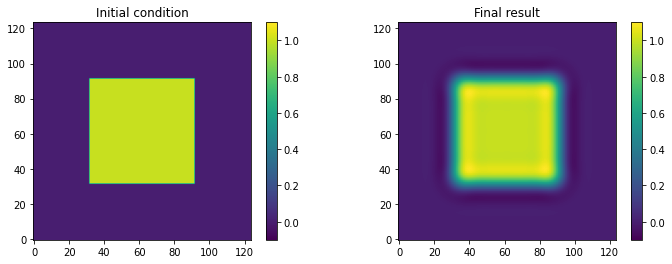

In [64]:
validate_results()